In [ ]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(1234)  # para reproducibilidade

### Etapas de preprocessamento: carregar dados, normalizar e dividir entre Treino e Teste

In [ ]:
# Carregar os dados
boston = load_boston()

print(boston.data.shape)
print(boston.target.shape)

# Embaralhar os dados 
#  (como vamos dividir os dados em dois grupos a partir de um pivot, 
#  este passo é necessario para caso os dados estejam ordenados por algum(ns) atributo(s))
p = np.random.permutation(len(boston.data))
boston.data, boston.target = boston.data[p], boston.target[p]

In [ ]:
# Observando o dominio dos atributos de X:
print(np.max(boston.data, axis=0))

In [ ]:
# Normalizar os dados de X para cada coluna, pois as colunas estao em escalas muito diferentes:
# A normalizazao usada (standardization) 
# se faz subtraindo a media e dividindo pelo desvio padrao para cada coluna

boston.data = (boston.data - boston.data.mean(axis=0)) / boston.data.std(axis=0)

In [36]:
# Adicionando uma coluna de 1's ao X:
boston.data = np.concatenate([np.ones(shape=[len(boston.data), 1]), boston.data], axis=1)

print("Novas dimensoes do X:", boston.data.shape)

Novas dimensoes do X: (506, 14)


In [37]:
# Definir quantos % do dataset será usado para treino
train_size = 0.8  # 80% para treino e 20% para teste
train_cut_point = int(train_size * len(boston.data))

X_train = boston.data[:train_cut_point]
y_train = boston.target[:train_cut_point]

X_test = boston.data[train_cut_point:]
y_test = boston.target[train_cut_point:]

print("Dataset de treino:", X_train.shape, y_train.shape)
print("Dataset de teste:", X_test.shape, y_test.shape)

Dataset de treino: (404, 14) (404,)
Dataset de teste: (102, 14) (102,)


### Treinar por meio do Método do Gradiente Descendente

In [38]:
alpha = 0.01  # taxa de aprendizado (learning rate)
n_epochs = 1000  # quantidade de passos de treinamento

In [39]:
# Pesos iniciais w aleatorios:
w = np.random.uniform(size=X_train.shape[1])

# Fase de treinamento:
for epoch in range(n_epochs):
    
    predicted_yi_list = []
    error_list = []
    
    grads = np.zeros(shape = w.shape)
        
    # Para cada exemplo:
    for i in range(len(X_train)):
        
        predicted_yi = np.dot(w, X_train[i])    
        
        predicted_yi_list.append(predicted_yi)
        
        e_i = y_train[i] - predicted_yi
        
        grads = grads + e_i * X_train[i]
        
    # Etapa de atualizacao dos parametros:
    w = w + (alpha * (1/len(X_train)) * grads)
    
    # Mostrando o erro medio quadratico para cada epoca:
    print("Epoca: {} - {}".format(epoch, mean_squared_error(y_train, predicted_yi_list)))
    

Epoca: 0 - 597.6701532812812
Epoca: 1 - 578.771374326528
Epoca: 2 - 561.1223563050239
Epoca: 3 - 544.5931202755836
Epoca: 4 - 529.06897684011
Epoca: 5 - 514.4486849139795
Epoca: 6 - 500.6428331486465
Epoca: 7 - 487.5724170622034
Epoca: 8 - 475.16758819471437
Epoca: 9 - 463.3665544715474
Epoca: 10 - 452.11461347738
Epoca: 11 - 441.3633025580838
Epoca: 12 - 431.06965161417503
Epoca: 13 - 421.19552616042137
Epoca: 14 - 411.70704973001455
Epoca: 15 - 402.574096023528
Epoca: 16 - 393.76984236470275
Epoca: 17 - 385.27037704631545
Epoca: 18 - 377.05435404698306
Epoca: 19 - 369.10268938873037
Epoca: 20 - 361.39829409862057
Epoca: 21 - 353.9258393472904
Epoca: 22 - 346.671549873003
Epoca: 23 - 339.62302227075435
Epoca: 24 - 332.76906513989314
Epoca: 25 - 326.0995584475486
Epoca: 26 - 319.6053297849496
Epoca: 27 - 313.27804547481196
Epoca: 28 - 307.11011473503896
Epoca: 29 - 301.0946053211466
Epoca: 30 - 295.2251692607099
Epoca: 31 - 289.4959774609063
Epoca: 32 - 283.9016621177097
Epoca: 33 - 27

In [26]:
# Calculando algumas metricas para medir o desempenho do modelo para os dados de treino
# (erro medio absoluto e erro medio quadratico)
train_mean_squared_error = mean_squared_error(y_train, predicted_yi_list)
train_mean_absolute_error = mean_absolute_error(y_train, predicted_yi_list)

Erro medio
  Quadratico: 17.575273355177824
  Absoluto: 3.0244699874390633


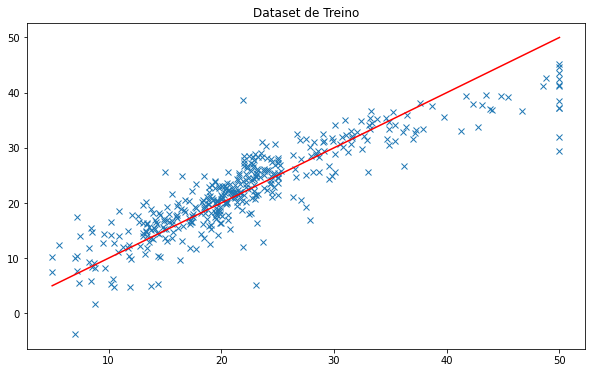

In [40]:
print("Erro medio\n  Quadratico: {}\n  Absoluto: {}".format(train_mean_squared_error, train_mean_absolute_error))
plt.figure(figsize=(10,6))
plt.plot(y_train, predicted_yi_list, "x")
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], "r")
plt.title("Dataset de Treino")
plt.show()

### Testando o modelo com novos dados

In [41]:
# Testando o modelo para o conjunto de teste:
predicted_yi_list = []
for i in range(len(X_test)):
    predicted_yi = np.dot(w, X_test[i])
    
    predicted_yi_list.append(predicted_yi)

In [29]:
# Calculando algumas metricas para medir o desempenho do modelo para os dados de teste
# (erro medio absoluto e erro medio quadratico)
test_mean_squared_error = mean_squared_error(y_test, predicted_yi_list)
test_mean_absolute_error = mean_absolute_error(y_test, predicted_yi_list)

Erro medio
  Quadratico: 45.81052632917368
  Absoluto: 3.9927059852957933


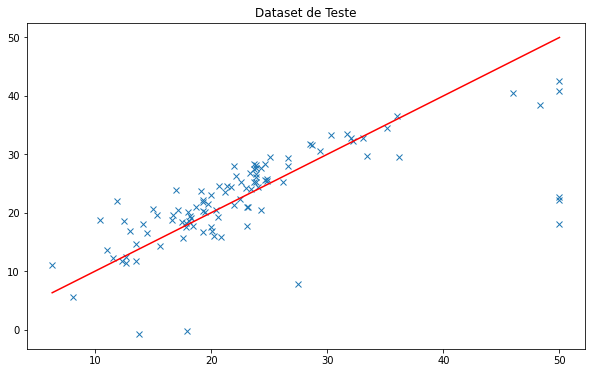

In [42]:
print("Erro medio\n  Quadratico: {}\n  Absoluto: {}".format(test_mean_squared_error, test_mean_absolute_error))

plt.figure(figsize=(10,6))
plt.plot(y_test, predicted_yi_list, "x")
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], "r")
plt.title("Dataset de Teste")
plt.show()